## log transformation

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error



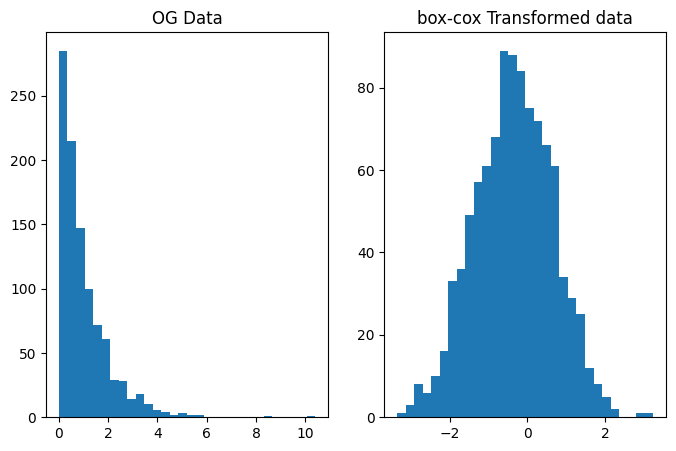

In [3]:
import scipy as stats
import matplotlib.pyplot as plt
from scipy.stats import boxcox
data = np.random.exponential(scale = 1,size = 1000)
transformed_data, lambda_value = boxcox(data)

plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.hist(data,bins = 30)
plt.title("OG Data")


plt.subplot(1,2,2)
plt.hist(transformed_data,bins = 30)
plt.title("box-cox Transformed data")

plt.show()

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error



In [48]:
data = pd.read_csv('beer-servings.csv')

data.shape

(193, 7)

In [41]:
data = data.iloc[:,1:]
data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


In [12]:
data.duplicated().sum()

np.int64(0)

In [42]:
num_df = data.select_dtypes(include = "number")
cat_df = data.select_dtypes(include = "object_")

cat_df
num_df

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0.0,0.0,0.0,0.0
1,89.0,132.0,54.0,4.9
2,25.0,0.0,14.0,0.7
3,245.0,138.0,312.0,12.4
4,217.0,57.0,45.0,5.9
...,...,...,...,...
188,NaN,100.0,3.0,7.7
189,111.0,2.0,1.0,2.0
190,6.0,0.0,0.0,0.1
191,32.0,19.0,4.0,2.5


['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']


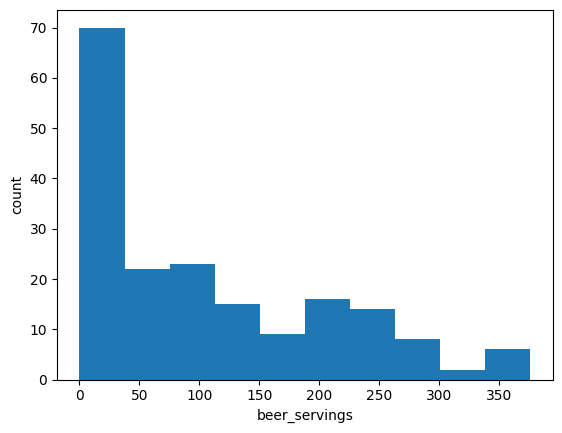

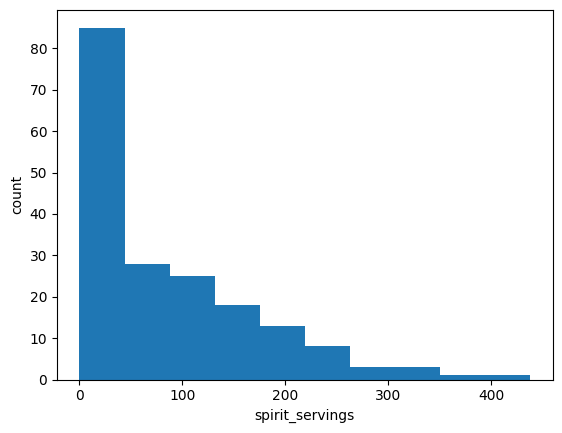

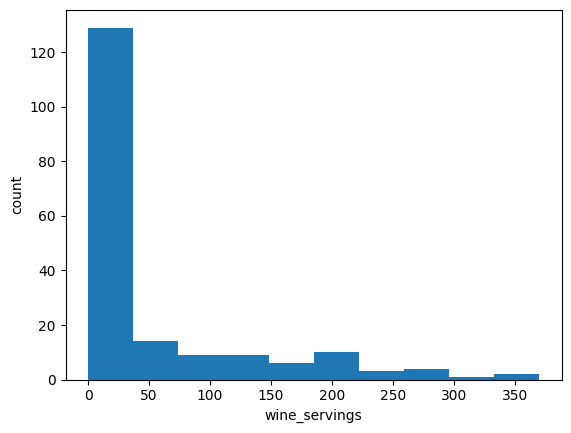

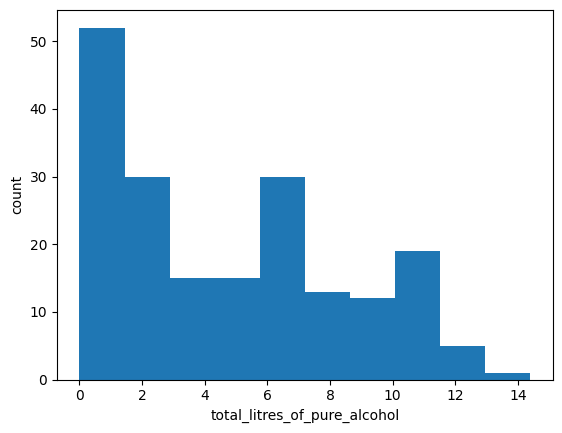

In [20]:
num_cols = num_df.columns.tolist()
print(num_cols)

for col in num_cols:
    plt.hist(num_df[col])
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()


## log transformation in beer serving data set num_df

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import boxcox

num_cols = num_df.columns.tolist()

for col in num_cols:
    if (num_df[col] <= 0).any():
        print(f"Skipping {col} due to non-positive values.")
        continue

    transformed_data, lambda_value = boxcox(num_df[col])

    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.hist(num_df[col], bins=30, color='skyblue')
    plt.title(f"Original: {col}")

    plt.subplot(1, 2, 2)
    plt.hist(transformed_data, bins=30, color='lightgreen')
    plt.title(f"Box-Cox: {col} (λ = {lambda_value:.2f})")

    plt.tight_layout()
    plt.show()


Skipping beer_servings due to non-positive values.
Skipping spirit_servings due to non-positive values.
Skipping wine_servings due to non-positive values.
Skipping total_litres_of_pure_alcohol due to non-positive values.


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import boxcox

# Loop over each numeric column
for col in num_df.columns:
    data = num_df[col]

    # Skip non-positive columns
    if (data <= 0).any():
        print(f"Skipping '{col}' — contains non-positive values")
        continue

    # Apply Box-Cox
    transformed_data, lambda_val = boxcox(data)

    # Plot original vs transformed
    plt.figure(figsize=(8, 5))
    
    plt.subplot(1, 2, 1)
    plt.hist(data, bins=30, color='skyblue')
    plt.title(f"Original: {col}")
    
    plt.subplot(1, 2, 2)
    plt.hist(transformed_data, bins=30, color='lightgreen')
    plt.title(f"Box-Cox Transformed: {col}\nλ = {round(lambda_val, 2)}")
    
    plt.tight_layout()
    plt.show()


Skipping 'beer_servings' — contains non-positive values
Skipping 'spirit_servings' — contains non-positive values
Skipping 'wine_servings' — contains non-positive values
Skipping 'total_litres_of_pure_alcohol' — contains non-positive values


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import boxcox

# Make a copy to avoid modifying original
num_df_cleaned = num_df.copy()

# Fill NaNs (Box-Cox cannot handle them) — optional: choose strategy
num_df_cleaned = num_df_cleaned.fillna(0)

# Apply Box-Cox where all values are > 0
for col in num_df_cleaned.columns:
    data = num_df_cleaned[col]

    # Skip if there are non-positive values
    if (data <= 0).any():
        print(f"Skipping '{col}' — contains non-positive values")
        continue

    # Apply Box-Cox
    transformed_data, lambda_val = boxcox(data)

    # Plot original vs transformed
    plt.figure(figsize=(8, 4))
    
    plt.subplot(1, 2, 1)
    plt.hist(data, bins=30, color='lightcoral')
    plt.title(f"Original: {col}")
    
    plt.subplot(1, 2, 2)
    plt.hist(transformed_data, bins=30, color='lightgreen')
    plt.title(f"Box-Cox: {col}\nλ = {round(lambda_val, 2)}")
    
    plt.tight_layout()
    plt.show()


Skipping 'beer_servings' — contains non-positive values
Skipping 'spirit_servings' — contains non-positive values
Skipping 'wine_servings' — contains non-positive values
Skipping 'total_litres_of_pure_alcohol' — contains non-positive values


## feature binning
## indicator variable